# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

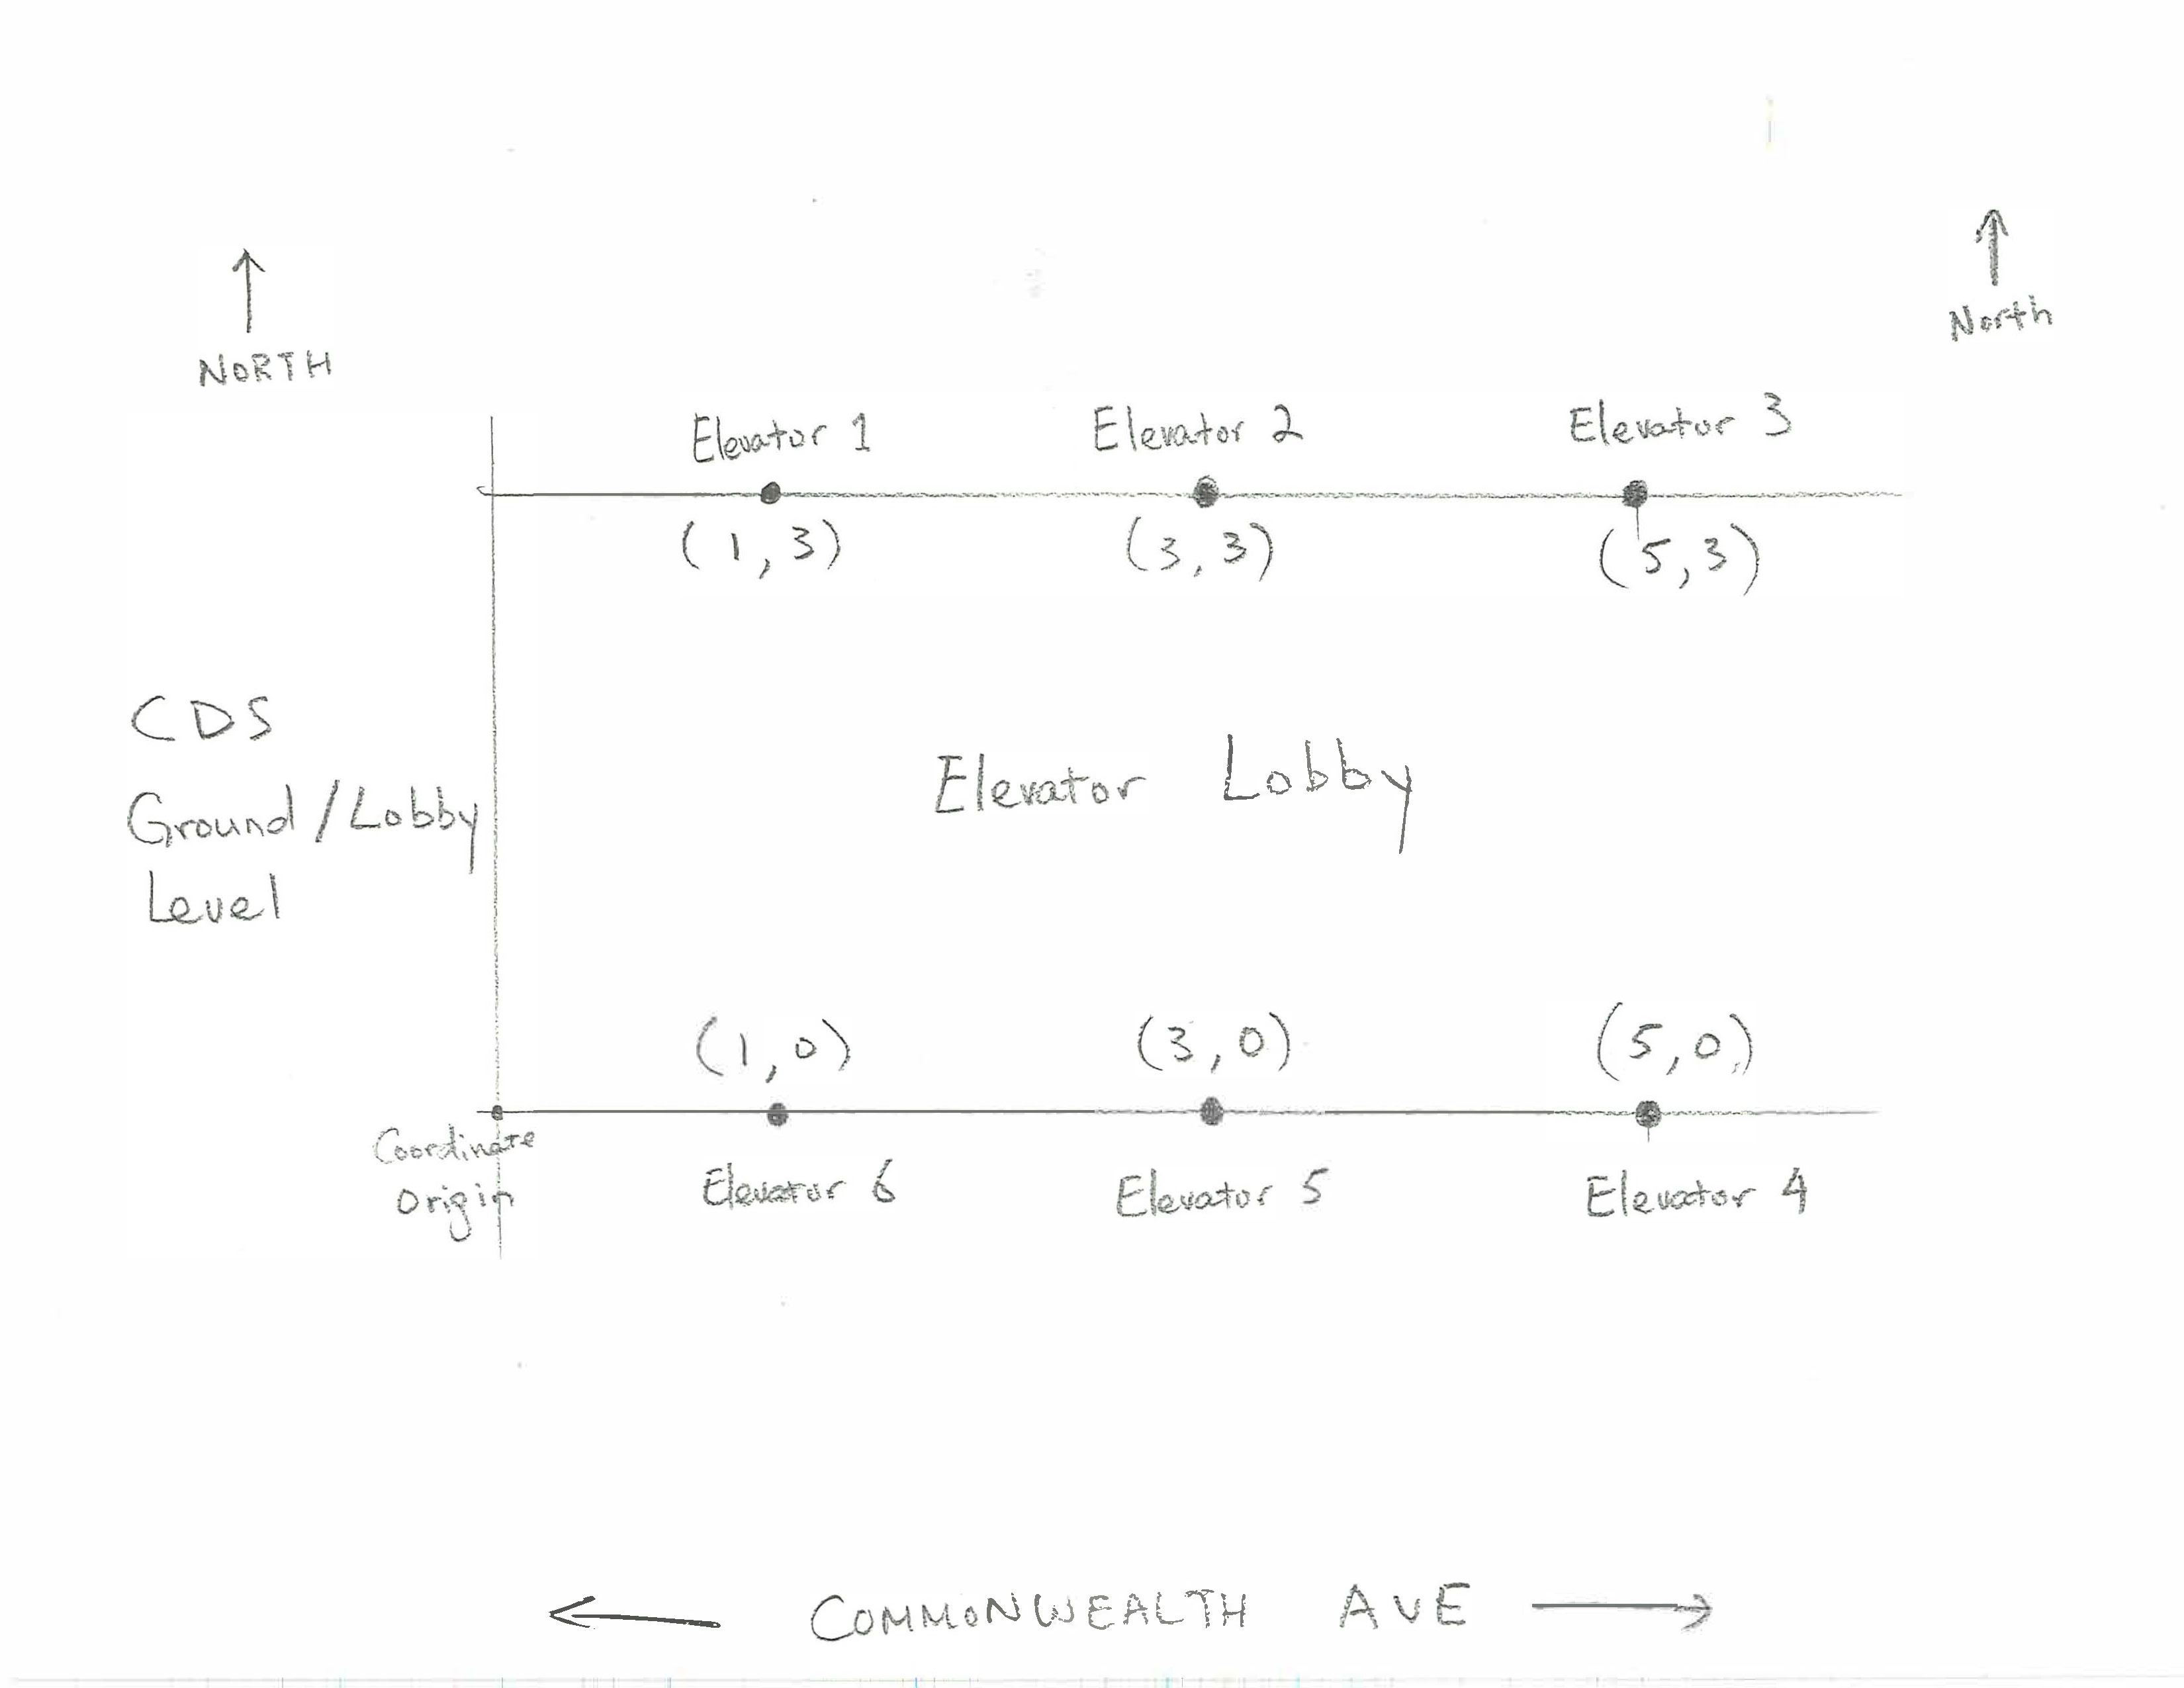

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** If we assume each elevator has an equal chance of being the next elevator to arrive, I would wait at (3, 1.5) to minimize expected walking distance. This is because it is the most central point I can stand resulting in the lowest average distance from each elevator.

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


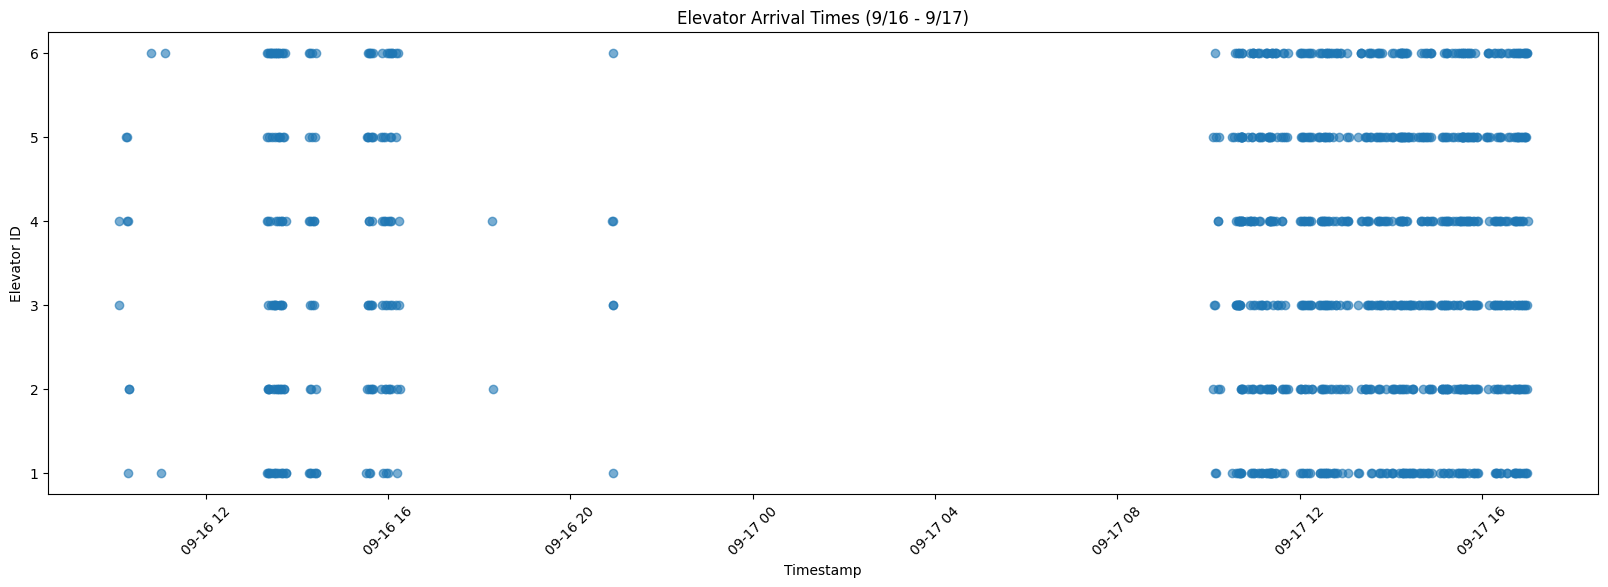

In [111]:
# Code for question 1:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import pandas as pd

file_path = '/content/drive/My Drive/Fall 2024/Training Data - Form Responses.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Display the first few rows to confirm the data is loaded correctly
df.head()

def make_plot():
  # Create a scatter plot
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
  plt.figure(figsize=(20, 6))
  plt.scatter(df['Timestamp'], df['Elevator ID'], alpha=0.6)
  plt.xlabel('Timestamp')
  plt.ylabel('Elevator ID')
  plt.title('Elevator Arrival Times (9/16 - 9/17)')
  plt.xticks(rotation=45)
  plt.show()


make_plot()



State observations here (briefly).

With the context that less people signed up for 9-16 compared to 9-17 for observations, we notice that on the 16th the elevators were most active (or people were most signed up) between 1pm and 4:30pm. On the 17th, there's constant usage from 10am to 5pm. The density of the data correlates to high usage of the elevators. It appears that roughly elevator 3 and 5 seem to have the most dense data (making it the most used).

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [112]:
# Write any data processing code you need here
def calculate_average_frequency():
    # Calculate the number of arrivals per elevator
    arrivals_count = df['Elevator ID'].value_counts().reset_index()
    arrivals_count.columns = ['Elevator ID', 'Total Arrivals']

    # Calculate the total duration of data collection
    start_time = df['Timestamp'].min()
    end_time = df['Timestamp'].max()

    # Subtracting total time not recorded by students
    total_duration_seconds = (end_time - start_time).total_seconds() - (1260 * 60)

    # Calculate average frequency of arrivals per second
    arrivals_count['Average Frequency (arrivals/sec)'] = arrivals_count['Total Arrivals'] / total_duration_seconds

    return arrivals_count, total_duration_seconds

# Get the average frequency table and total duration
average_frequency_table, total_duration_seconds = calculate_average_frequency()

# Print the results
print("Average Frequency Table:")
print(average_frequency_table)
print(f"\nTotal Duration (seconds): {total_duration_seconds}")

Average Frequency Table:
   Elevator ID  Total Arrivals  Average Frequency (arrivals/sec)
0            3             170                          0.004763
1            4             168                          0.004707
2            5             167                          0.004679
3            2             162                          0.004539
4            6             159                          0.004455
5            1             155                          0.004342

Total Duration (seconds): 35694.0


**Answer:**

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 35694.0 | 35694.0 | 35694.0 | 35694.0 | 35694.0 | 35694.0 |
| Number of arrivals | 155 | 162 | 170 | 168 | 167 | 159 |
| Average frequency (arrivals per second) | 0.004342 | 0.004539 | 0.004763 | 0.004707 | 0.004679 | 0.004455 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [113]:
def calculate_probabilities(average_frequency_table):
    # Calculate the total arrivals
    total_arrivals = average_frequency_table['Total Arrivals'].sum()

    # Calculate probabilities for each elevator
    average_frequency_table['Probability'] = average_frequency_table['Total Arrivals'] / total_arrivals

    # Ensure probabilities sum to one
    assert abs(average_frequency_table['Probability'].sum() - 1) < 1e-6, "Probabilities do not sum to one!"

    return average_frequency_table[['Elevator ID', 'Probability']]

# Get the probabilities table
probabilities_table = calculate_probabilities(average_frequency_table)

# Print the results
print("Probability of Each Elevator Being the Next to Arrive:")
print(probabilities_table)

Probability of Each Elevator Being the Next to Arrive:
   Elevator ID  Probability
0            3     0.173293
1            4     0.171254
2            5     0.170234
3            2     0.165138
4            6     0.162080
5            1     0.158002


**Answer:** TODO

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.158002 | 0.165138 | 0.173293 | 0.171254 | 0.170234 | 0.162080 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


In [114]:
# Example coordinates for elevators (replace with actual coordinates)
elevator_locations = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (1, 0),
    5: (3, 0),
    6: (5, 0),
}


def calculate_optimal_wait_location(probabilities_table, elevator_locations):
    # Prepare arrays for calculation
    weighted_x = 0
    weighted_y = 0

    total_probability = probabilities_table['Probability'].sum()  # Should be 1

    # Calculate the weighted average of coordinates
    for index, row in probabilities_table.iterrows():
        elevator_id = row['Elevator ID']
        probability = row['Probability']


        # Get coordinates for the elevator
        if elevator_id in elevator_locations:
            x, y = elevator_locations[elevator_id]
            weighted_x += x * probability
            weighted_y += y * probability

    return (weighted_x, weighted_y)

# Get the optimal location
optimal_location = calculate_optimal_wait_location(probabilities_table, elevator_locations)

# Print the result
print(f"Optimal Location to Wait for an Elevator: {optimal_location}")



Optimal Location to Wait for an Elevator: (3.0122324159021407, 1.4892966360856268)


**Answer:**
(3.0122370000000003, 1.489299)

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [118]:
# Define elevator locations (replace with your actual coordinates)
elevator_locations = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (1, 0),
    5: (3, 0),
    6: (5, 0),
}

def get_average_walk_distance(data, coordinate):
    '''
    Calculate the average distance traveled to the next elevator arrival from a given coordinate.

    data: CSV file containing the data.
    coordinate: The coordinate to wait at, in the format (x, y).
    '''
    df = pd.read_csv(data)
    print(df.columns)
    total_distance = 0
    count = 0

    for index, row in df.iterrows():
        elevator_id = row['Elevator ID']  # Adjust according to your actual column name

        # Check if the elevator ID is valid
        if elevator_id in elevator_locations:
            elevator_coordinate = elevator_locations[elevator_id]
            distance = np.linalg.norm(np.array(coordinate) - np.array(elevator_coordinate))
            total_distance += distance
            count += 1

    average_walk_distance = total_distance / count if count > 0 else 0
    return average_walk_distance

# Coordinates from previous questions
coordinate_q1 = (3, 1.5)  # Coordinates from Question 1
coordinate_q5 = (3.0122324159021407, 1.4892966360856268)  # Coordinates from Question 5

# Calculate average distances
average_distance_q1 = get_average_walk_distance('/content/drive/My Drive/Fall 2024/Training Data - Form Responses.csv', coordinate_q1)
average_distance_q5 = get_average_walk_distance('/content/drive/My Drive/Fall 2024/Training Data - Form Responses.csv', coordinate_q5)

# Output the results
print(f"Average Distance from Location in Question 1: {average_distance_q1:.2f}")
print(f"Average Distance from Location in Question 5: {average_distance_q5:.2f}")

# Check if Q5 result is shorter than Q1
if average_distance_q5 < average_distance_q1:
    print("The average distance from Question 5 is shorter than from Question 1.")
else:
    print("The average distance from Question 5 is not shorter than from Question 1.")


Index(['Timestamp', 'Elevator ID', 'Email Address'], dtype='object')
Index(['Timestamp', 'Elevator ID', 'Email Address'], dtype='object')
Average Distance from Location in Question 1: 2.16
Average Distance from Location in Question 5: 2.16
The average distance from Question 5 is shorter than from Question 1.


**Answer:**

Average Distance from Location in Question 1: 2.16     
Average Distance from Location in Question 5: 2.16

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
| (3, 1.5) | 2.16 | 2.163793103448276 |
| (3.0122324159021407, 1.4892966360856268) | 2.16 | 2.1637745370567614 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:**
Ultimately the answer I got from this assignment was nearly the same set of coordinates as my initial naive guess. I guessed the center because the central point seemed to minimize the walking distance especially if probability for each elevator was the same. From Question 4 I saw the probabilities for each elevator was not substantially large enough for us to completely shift where we stand. There was slight movement but overall we stayed near (3, 1.5). Data collection may have influenced the results, perhaps people missing certain elevator openings and being distracted skewed results leading to inaccurate probabilities.

In [117]:
# Calculate average distances for test data
average_distance_test_q1 = get_average_walk_distance('/content/drive/My Drive/Fall 2024/Testing Data - Form Responses.csv', coordinate_q1)
average_distance_test_q5 = get_average_walk_distance('/content/drive/My Drive/Fall 2024/Testing Data - Form Responses.csv', coordinate_q5)

print(average_distance_test_q1)
print(average_distance_test_q5)

# Reflection on success of finding a good waiting location
if average_distance_test_q5 < average_distance_test_q1:
    print("The smart position (Question 5) resulted in a shorter average distance.")
else:
    print("The smart position (Question 5) did not result in a shorter average distance.")


Index(['Timestamp', 'Elevator ID', 'Email Address'], dtype='object')
Index(['Timestamp', 'Elevator ID', 'Email Address'], dtype='object')
2.163793103448276
2.1637745370567614
The smart position (Question 5) resulted in a shorter average distance.
